In [1]:
%run ../../macro_tQ.py
import sys
sys.path.append('../../')
import macro_tQ as tQ

/opt/anaconda3/envs/TalentQ/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


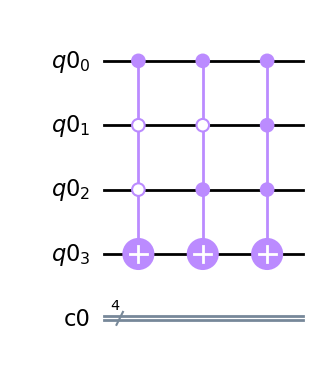

In [2]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.circuit.library import MCXGate

qr = QuantumRegister(4)
cr = ClassicalRegister(4)

qc = QuantumCircuit(qr, cr, name='q')

qc.append(MCXGate(3, ctrl_state=1), qr)
qc.append(MCXGate(3, ctrl_state=5), qr)
qc.append(MCXGate(3, ctrl_state=7), qr)

qc.draw(output='mpl')

In [3]:
def oracle(f_outputs): 
    
    n = int(np.log2(len(f_outputs)))  #dimension del registro de entrada |x> 
    m = len(f_outputs[0])             #dimension del registro de salida |f(x)>
#    print(m)
    #generamos todos los posibles inputs en binario, completando con ceros hasta tener strings de n bits
    inputs = [format(i, 'b').zfill(n) for i in range(2**n)]
#    print(f_outputs[0])
    
    qr_input = QuantumRegister(n, name='input')
    qr_output = QuantumRegister(m, name='output')
    qc = QuantumCircuit(qr_input, qr_output)

    # Hacemos un bucle sobre los inputs
    for i,input_str in enumerate(inputs):
        ctrl_state= int(input_str[::],2)
        # Para cada input, i, haz un bucle sobre cada bit del output     
        for j,output_bit in enumerate(f_outputs[i]):
#            print(j,output)
            if output_bit =='1':
                qc.append(MCXGate(len(input_str), ctrl_state=ctrl_state),qr_input[:]+[qr_output[m-j-1]])  

    return qc

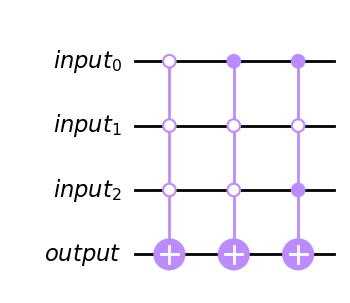

In [4]:
 f_out_1 = ['1111', '1011', '0011', '1000', '0101', '0100', 
               '0000', '1110', '0101', '0100', '0000', '1110', 
               '1111', '1011', '0011', '1000']

f_out_2= ['000', '001', '010', '011', '100', '101', '110', '111']
    
f_out_3= ['1', '1', '0', '0', '0', '1', '0', '0']


oracle(f_out_3).draw('mpl')

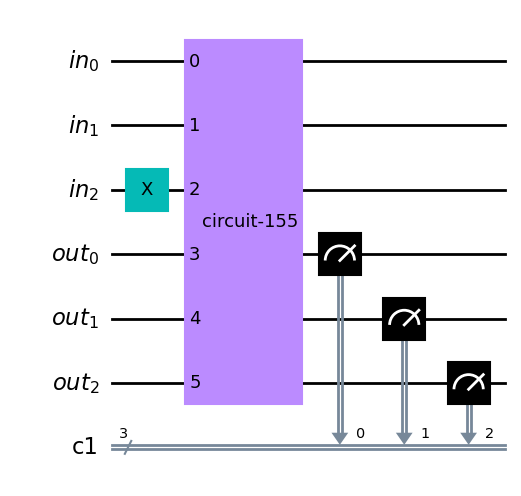

In [5]:
n=3
qr_in = QuantumRegister(n, name='in')
qr_out = QuantumRegister(n, name='out')
cr = ClassicalRegister(n)
qc = QuantumCircuit(qr_in,qr_out,cr)


qc.x(2)
qc.append(oracle(f_out_2).to_gate(),qr_in[:]+qr_out[:])
qc.measure(qr_out,cr)

qc.draw('mpl')

In [6]:
from qiskit.primitives import Sampler

counts = Sampler().run(qc,shots=1).result().quasi_dists[0]

for keys,values in counts.items():
    print("{0:b}".format(keys),values)

100 1.0


In [7]:
def linear_circuit(x,a):
       
    assert(len(x)==len(a))

    # Inicialización de los registros
    qr_in = QuantumRegister(len(a), name='qr_in')
    qr_out = QuantumRegister(1, name='qr_out')
    cr = ClassicalRegister(1, name='cr')  
    qc = QuantumCircuit(qr_in, qr_out, cr, name='q_linear')
    
    'inicializamo el estado x '
    for i, xq in enumerate(reversed(x)):  # ojo con la ordenación de qiskit, por eso está reversed()
        if xq == '1':
             qc.x(qr_in[i]) 

    qc.barrier()

    'codificamos la función lineal x.a '
    for i, aq in enumerate(reversed(a)):
        if aq == '1':
             qc.cx(qr_in[i],qr_out) 
            
    qc.barrier()
    qc.measure(qr_out[0],cr[0])
    
    return qc 

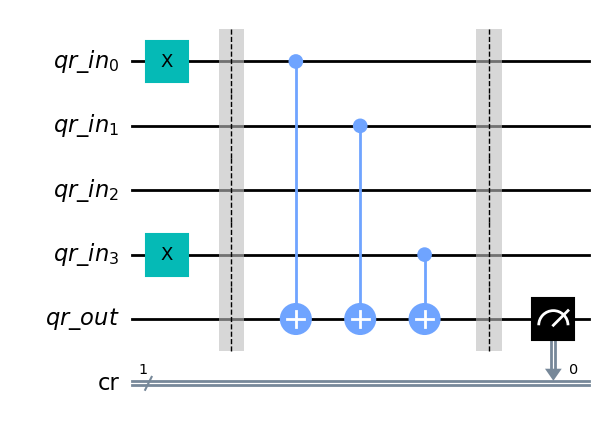

In [8]:
a = '1011'
x = '1001'

qc=linear_circuit(x,a)
qc.draw('mpl')

In [9]:
n_tiradas = 1

counts = Sampler().run(qc,shots=1).result().quasi_dists[0]

print(counts)

{0: 1.0}
